## Hand-Written Digit Reader
## Richard Cooke
## G00331787

### Approach of this notebook was based on this work: https://www.ics.uci.edu/~mohamadt/keras_mnist.html#Load-data-set.

This model was created as part of the Emerging Technologies project where we attempt to apply this model to a web application where a user 
will input a hand-written digit and a predicition on what digit the user entered should be returned to them. This model will mainly use the features of keras and numpy to complete this operation.

## Making The Necessary Imports

In [1]:
# Used to plot data
import numpy as np
import matplotlib.pyplot as plt

# Used to create the Neural network
import keras as kr
import gzip

Using TensorFlow backend.


## Loading and Decompressing the dataset

In [2]:
# Importing the the mnist dataset
# Dataset used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping the data using normalisation
# Original data is [0-255]. Scale it to range [0,1].
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)

train_img = train_img.astype('float32')
test_img = test_img.astype('float32')

train_img = train_img/255
test_img = test_img/255 

# mnist dataset contains 10 different digits
digits= 10

# Passed the labels to one hot vecotrs with a vector size of 10
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

print("One hot vector at index 5 of training labels ", train_lbl[5])

One hot vector at index 5 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Displaying the images from the datasets

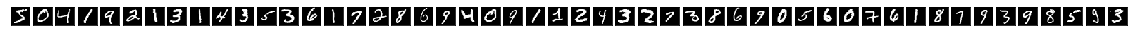

In [3]:
# Plotting examples of the data in the set
plt.figure(1, figsize=(20,10))

# For loop that will iterate 50 times to display the first 50 images in the dataset
for i in range(50):
    plt.subplot(1,50,i+1)
    
    #shows the relevant image
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    # Removing label markings from both the x and y axis'
    plt.xticks([])
    plt.yticks([])

## Creating the Neural Network

In [4]:
# Creating the neural netwrok by using the models import from keras
model = kr.models.Sequential()

print("Sequential model created")

# Creating the layers of the netwrok using the Dense call from the layers import
# Creating 3 dense layers
model.add(kr.layers.Dense(512, activation='relu', input_shape=(784,))) # Use input_shape=(28,28) for unflattened data.
model.add(kr.layers.Dense(512, activation='relu'))
model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers added to model")

Sequential model created
Layers added to model


In [5]:
# Prints out a string summary of the model
print("Model Summary")
model.summary()

Model Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compiles and completes the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled")

Model compiled


## Training the Model

In [7]:
# Batch size is number of samples that will be testsed
# Epochs is the amount of times the test is repeated
history = model.fit(train_img, train_lbl, batch_size=50, epochs=5, verbose=1, validation_data=(test_img, test_lbl))

#Testing with more than 10 epochs pushes model too far to 100% accuracy

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 203us/step - loss: 0.1878 - accuracy: 0.9439 - val_loss: 0.1039 - val_accuracy: 0.9664
Epoch 2/5
60000/60000 [==============================] - 11s 183us/step - loss: 0.0779 - accuracy: 0.9758 - val_loss: 0.0741 - val_accuracy: 0.9761
Epoch 3/5
60000/60000 [==============================] - 11s 185us/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.0710 - val_accuracy: 0.9772
Epoch 4/5
60000/60000 [==============================] - 11s 187us/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0678 - val_accuracy: 0.9790
Epoch 5/5
60000/60000 [==============================] - 11s 189us/step - loss: 0.0282 - accuracy: 0.9908 - val_loss: 0.0763 - val_accuracy: 0.9792


## Evaluating Efficiency

This evaluation section of the notebook does not need to run for the notebook to work, it simply exists as an option to view the efficiency of the model in both string and graph format

In [8]:
# Calculates and displays the loss and accuracy of the model
score = model.evaluate(train_img, train_lbl, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.026184130
Test accuracy: 0.991366684


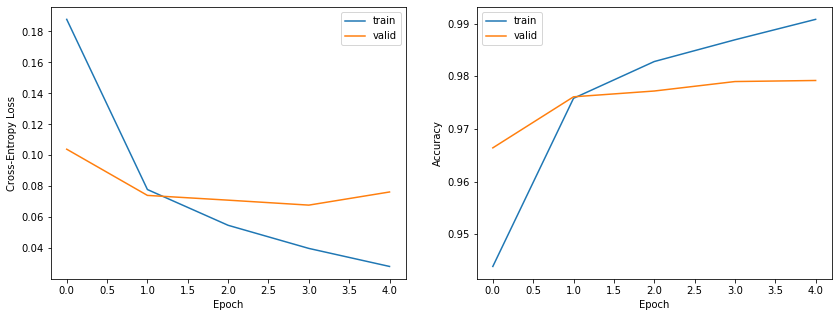

In [9]:
#Plotting the loss trajectory during training
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plotting the accuracy during training
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Saving The Model

In [10]:
print("Saving Model......")
model.save('digit_reader.h5')
print("Model Saved.")

Saving Model......
Model Saved.


## Loading an instance of the newly saved Model

This section of the model is for testing purposes wherein an instance of the recently saved model is generated and then is passed a test image to match against the training images and returns a prediction on what digit it has been passed and returns a prediction and normalized percentages for each digit.

In [11]:
#Loading the saved Model
print("Loading Model......")
loadedModel = kr.models.load_model('digit_reader.h5')
print("Model loaded.")

Loading Model......
Model loaded.


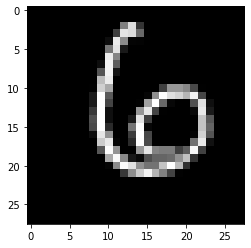

[[2.2604343e-07 7.0279282e-10 2.3743305e-10 4.9260849e-11 8.3073338e-08
  4.7283751e-07 9.9999917e-01 4.2056814e-12 2.8351088e-09 7.0103558e-12]] 
Predicted number:  6


In [12]:
# Plots the image that will be passed for prediction
plt.imshow(test_img[100].reshape(28, 28), cmap="gray")
plt.show()

# Returns normalized output for each digit and also uses argmax to return the actual prediction
print(loadedModel.predict(test_img[100:101]), "\nPredicted number: ", np.argmax(loadedModel.predict(test_img[100:101])))

## Other References

* https://keras.io/
* https://www.tensorflow.org/guide/keras/overview
* https://www.python.org/
* https://web.microsoftstream.com/video/8e965392-ccc2-4faa-a755-8d86de6a91d6?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D135
* https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
 